# Project: Bank Credit Loan

For this project my friend and I are launching a startup  
offering risk evaluation as a service for retail banks, leveraging  
machine learning to predict loan defaults. I'm in charge of product development,  
including data analysis and model building. To create a proof-of-concept (POC),  
I plan to analyze a dataset from Home Credit Group and develop multiple machine learning  
models that capture patterns in load defaults, ensuring a diverse and robust  
offering for potential clients

## Project's fulfilment plan

#### **Problem understanding and Dataset Exploration:**  
- Banks want to minimize loan defaults and assess the creditworthiness  
- Home Credit Group dataset contains information relevant to loan defaults  
- Machine learning models can help capture patterns and predict defaults more  
effectively than traditional scoring methods  

#### **Main Objectives:**  
1) **Undertand the dataset and the buisiness problem, identify**  
**key features and validate potential machine learning model for predicting laon defaults**  
    - Load the Home Credit dataset and explore its structure  
    - Identify missing values, data types and overall data quality  
    - Understand Target values  
    - Handle missing values, outliers, data imbalances  
    - Choose few key features that are likely to have highest impact to loan defaults  
    and perform EDA with it  
    - Perform feature engineering, create new features, tranform existing ones. (This step  
    might be in the future objectives too)  
2) **Develop a baseline machine learning model to predict loan defaults, providing**  
**a starting point for more advanced models**  
    - Identify and select key features that are likely to impact loan defaults  
    - Adress multicollinearity, correlations, degree of dependency, variance inflation  
    factor (VIF)  
    - Split data into training and testing sets to ensure proper model evaluation  
    - Choose multiple models and evaluate accuracy, precision, recall, AUC-ROC score to understand  
    how well it captures defaults  
3) **Build and evaluate more advanced models, tuning parameters and using a variety of approaches**  
**to maximize prediction accuracy**  
    - Choose one or two models that performed strongest and use hyperparameter tuning  
    - Compare models based on key metrics  
    - Use feature importance to identify which factors contribute most to the prediction of  
    loan defaults  
    - Adress class imbalance through techniques like SMOTE or adjust the decision threshold  
    if needed  
4) **Validate the chosen model, ensuring accuracy, fairness and interpretability and prepare to**  
**present results to potential clients**  
    - Use k-fold cross-validation to ensure the model performs well  
    - Test model on unseen data and evaluate performance metrics  
    - Use SHAP or LIME to explain the model's decisions  
    - Create clear visualizations of feature importance and model predictions  
5) **Deploy validated machine learning model to Google Cloud Platform using any deployment**  
**option that has and HTTP request**  
6) **Provide final summary and evaluate overall success**


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import functions_sandbox as sand
importlib.reload(sand)
import pickle
import scipy.stats  as stats
from scipy.stats import anderson, spearmanr, normaltest, ttest_ind, shapiro, levene
from statsmodels.stats.proportion import proportions_ztest
from imblearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mutual_info_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    KFold,
    RandomizedSearchCV,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [3]:
# p_train = r"C:\Users\vykintas.palskys\OneDrive - Thermo Fisher Scientific\Desktop\p4\home-credit-default-risk\application_train.csv"
# p_test = r"C:\Users\vykintas.palskys\OneDrive - Thermo Fisher Scientific\Desktop\p4\home-credit-default-risk\application_test.csv"
# p_bureau = r"C:\Users\vykintas.palskys\OneDrive - Thermo Fisher Scientific\Desktop\p4\home-credit-default-risk\bureau.csv"
# p_bureau_balance = r"C:\Users\vykintas.palskys\OneDrive - Thermo Fisher Scientific\Desktop\p4\home-credit-default-risk\bureau_balance.csv"
# p_credit_card_balance = r"C:\Users\vykintas.palskys\OneDrive - Thermo Fisher Scientific\Desktop\p4\home-credit-default-risk\credit_card_balance.csv"
# p_pos_cash_balance = r"C:\Users\vykintas.palskys\OneDrive - Thermo Fisher Scientific\Desktop\p4\home-credit-default-risk\POS_CASH_balance.csv"
# p_prev_app = r"C:\Users\vykintas.palskys\OneDrive - Thermo Fisher Scientific\Desktop\p4\home-credit-default-risk\previous_application.csv"
# p_inst_payments = r"C:\Users\vykintas.palskys\OneDrive - Thermo Fisher Scientific\Desktop\p4\home-credit-default-risk\installments_payments.csv"
# p_homecredit_descr = r"C:\Users\vykintas.palskys\OneDrive - Thermo Fisher Scientific\Desktop\p4\home-credit-default-risk\HomeCredit_columns_description.csv"

p_train = r"D:\IT_projects\Turing_Colledge\Modul3\home-credit-default-risk\application_train.csv"
p_test = r"D:\IT_projects\Turing_Colledge\Modul3\home-credit-default-risk\application_test.csv"
p_bureau = r"D:\IT_projects\Turing_Colledge\Modul3\home-credit-default-risk\bureau.csv"
p_bureau_balance = (
    r"D:\IT_projects\Turing_Colledge\Modul3\home-credit-default-risk\bureau_balance.csv"
)
p_credit_card_balance = r"D:\IT_projects\Turing_Colledge\Modul3\home-credit-default-risk\credit_card_balance.csv"
p_pos_cash_balance = r"D:\IT_projects\Turing_Colledge\Modul3\home-credit-default-risk\POS_CASH_balance.csv"
p_prev_app = r"D:\IT_projects\Turing_Colledge\Modul3\home-credit-default-risk\previous_application.csv"
p_inst_payments = r"D:\IT_projects\Turing_Colledge\Modul3\home-credit-default-risk\installments_payments.csv"
p_homecredit_descr = r"D:\IT_projects\Turing_Colledge\Modul3\home-credit-default-risk\HomeCredit_columns_description.csv"

dataframes = {
    "df_train": pd.read_csv(p_train),
    "df_test": pd.read_csv(p_test),
    "df_bureau": pd.read_csv(p_bureau),
    "df_bureau_balance": pd.read_csv(p_bureau_balance),
    "df_credit_card_balance": pd.read_csv(p_credit_card_balance),
    "df_pos_cash_balance": pd.read_csv(p_pos_cash_balance),
    "df_prev_app": pd.read_csv(p_prev_app),
    "df_inst_payments": pd.read_csv(p_inst_payments),
    "df_homecredit_descr": pd.read_csv(p_homecredit_descr, encoding="latin-1"),
}

Firstly, check shape of each dataset to get understanding of what size data  
we will be working with

In [4]:
for key, df in dataframes.items():
    print(f"{key} with shape {df.shape}")

df_train with shape (307511, 122)
df_test with shape (48744, 121)
df_bureau with shape (1716428, 17)
df_bureau_balance with shape (27299925, 3)
df_credit_card_balance with shape (3840312, 23)
df_pos_cash_balance with shape (10001358, 8)
df_prev_app with shape (1670214, 37)
df_inst_payments with shape (13605401, 8)
df_homecredit_descr with shape (219, 5)


We can see, that each dataset has different shape but most of the datasets  
have milions of datapoints

In [5]:
# veliau bus nebereikalinga scriptas
dataframes["df_inst_payments"].columns.to_list()

['SK_ID_PREV',
 'SK_ID_CURR',
 'NUM_INSTALMENT_VERSION',
 'NUM_INSTALMENT_NUMBER',
 'DAYS_INSTALMENT',
 'DAYS_ENTRY_PAYMENT',
 'AMT_INSTALMENT',
 'AMT_PAYMENT']

In [9]:
"""
1) Check how many active credits client has and how it impacts to target
2) Check amount credit maximum overdue
3) Count family members
4) Check Name Education Type
5) Check age on Days Birth
6) Check how much time client is employed
7) Learn about ext_source and check if looks promising


- Get answer if all 120 features needed to use or it's better to use like 20 (deleted for now)
- Don't know if I should change dtype for binary-numeric feature (changed for now)
"""

"\n1) Check how many active credits client has and how it impacts to target\n2) Check amount credit maximum overdue\n3) Count family members\n4) Check Name Education Type\n5) Check age on Days Birth\n6) Check how much time client is employed\n7) Learn about ext_source and check if looks promising\n\n\n- Get answer if all 120 features needed to use or it's better to use like 20 (deleted for now)\n- Don't know if I should change dtype for binary-numeric feature (changed for now)\n"

In [10]:
pd.set_option("display.max_columns", None)

---

## Data cleaning

First of all I will look at the main dataset - "df_train" to see what's the  
current state of dataset and values is

In [82]:
df_train = dataframes["df_train"]

In [83]:
df_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

I will check which features have NaN  values populated more than 40%. If any,  
these should be deleted since according to literature, data with > 40% NaN are  
considered to be very problematic for ML model to work with and might impact  
results negatively

In [84]:
datapoints = df_train.shape[0]

In [85]:
print(f"List of features that have NaN values > 40%:")
for col in df_train.columns:
    na_percent = df_train[col].isna().mean() * 100
    if na_percent > 40:
        print(f"{col}: {na_percent:.2f}% NaN values")

List of features that have NaN values > 40%:
OWN_CAR_AGE: 65.99% NaN values
EXT_SOURCE_1: 56.38% NaN values
APARTMENTS_AVG: 50.75% NaN values
BASEMENTAREA_AVG: 58.52% NaN values
YEARS_BEGINEXPLUATATION_AVG: 48.78% NaN values
YEARS_BUILD_AVG: 66.50% NaN values
COMMONAREA_AVG: 69.87% NaN values
ELEVATORS_AVG: 53.30% NaN values
ENTRANCES_AVG: 50.35% NaN values
FLOORSMAX_AVG: 49.76% NaN values
FLOORSMIN_AVG: 67.85% NaN values
LANDAREA_AVG: 59.38% NaN values
LIVINGAPARTMENTS_AVG: 68.35% NaN values
LIVINGAREA_AVG: 50.19% NaN values
NONLIVINGAPARTMENTS_AVG: 69.43% NaN values
NONLIVINGAREA_AVG: 55.18% NaN values
APARTMENTS_MODE: 50.75% NaN values
BASEMENTAREA_MODE: 58.52% NaN values
YEARS_BEGINEXPLUATATION_MODE: 48.78% NaN values
YEARS_BUILD_MODE: 66.50% NaN values
COMMONAREA_MODE: 69.87% NaN values
ELEVATORS_MODE: 53.30% NaN values
ENTRANCES_MODE: 50.35% NaN values
FLOORSMAX_MODE: 49.76% NaN values
FLOORSMIN_MODE: 67.85% NaN values
LANDAREA_MODE: 59.38% NaN values
LIVINGAPARTMENTS_MODE: 68.35

We can see that there are many features that have NaNs > 40%. These will be  
deleted if none of them have huge impact to target feature

In [86]:
df_train_cleaned = df_train.copy()
df_train_cleaned, deleted = sand.column_delete(df_train_cleaned, nan_perc=40)
print(f"Dataframe shape: {df_train_cleaned.shape}")

Columns with > 40% NaN values dropped: 
['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'W

In [16]:
# Percentage calculation of NaNs for each feature
nans = df_train_cleaned.isna().sum()
perc = (nans / len(df_train_cleaned)) * 100
res = pd.DataFrame({"nan_count":nans, "percentage":round(perc, 2)})
res.sort_values(by="percentage", ascending=False).head(5)

,nan_count,percentage
OCCUPATION_TYPE,96391,31.35
EXT_SOURCE_3,60965,19.83
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,13.50


After deleting some columns that have NaNs > 40%, we have left with more stable data  
having with the most of NaNs of 31%, second ~20% and third 13.5%

There are many features with binary-numeric dtype which could be transformed  
into categorical dtype. This would be more useful when dealing with tree  
based ML models

In [17]:
numbin = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", 
          "FLAG_PHONE", "FLAG_EMAIL", "REG_REGION_NOT_LIVE_REGION", 
          "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", 
          "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "FLAG_DOCUMENT_2", 
          "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", 
          "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", 
          "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", 
          "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", 
          "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", 
          "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]
df_train_cleaned[numbin] = df_train_cleaned[numbin].astype("category")
df_train_cleaned[numbin].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   FLAG_MOBIL                   307511 non-null  category
 1   FLAG_EMP_PHONE               307511 non-null  category
 2   FLAG_WORK_PHONE              307511 non-null  category
 3   FLAG_CONT_MOBILE             307511 non-null  category
 4   FLAG_PHONE                   307511 non-null  category
 5   FLAG_EMAIL                   307511 non-null  category
 6   REG_REGION_NOT_LIVE_REGION   307511 non-null  category
 7   REG_REGION_NOT_WORK_REGION   307511 non-null  category
 8   LIVE_REGION_NOT_WORK_REGION  307511 non-null  category
 9   REG_CITY_NOT_LIVE_CITY       307511 non-null  category
 10  REG_CITY_NOT_WORK_CITY       307511 non-null  category
 11  FLAG_DOCUMENT_2              307511 non-null  category
 12  FLAG_DOCUMENT_3              307511 non-null

We need to fill empty spaces (NaNs) of each column. But before doing it, I  
will categorize data types of the features to numeric and categoric

In [18]:
cat_selector = selector(dtype_include=[object, "category"])
num_selector = selector(dtype_include=[int, float])

categoric = cat_selector(df_train_cleaned)
numeric = num_selector(df_train_cleaned)

To fill numeric values, I am using median value of column because mean is  
usually worse choice than median when data distribution is not normal and for  
categorical - imputation method with SimpleImputer will be used most_frequent value

In [146]:
df_train_filled = df_train_cleaned.copy()
df_train_filled = sand.nan_imput(df_train_filled, numeric, categoric)
df_train_filled.isna().any().any()

False

During imputation method, some of features with INT dtype changed to FLOAT.  
It happens because SimpleImputer function outputs FLOAT arrays by default,  
even if the input data is integer. I made a list of these and reversed to INT

In [147]:
to_int = ["SK_ID_CURR", "TARGET", "CNT_CHILDREN", "DAYS_BIRTH", "DAYS_EMPLOYED", 
          "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS", 
          "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", 
          "HOUR_APPR_PROCESS_START", "LIVE_CITY_NOT_WORK_CITY", 
          "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", 
          "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", 
          "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", 
          "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", 
          "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
df_train_filled[to_int] = df_train_filled[to_int].astype(int)

In [148]:
df_train_filled["ORGANIZATION_TYPE"].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

Since dataset seems clean, a final check was done with my function, named  
cleaner, to check if there are any NaNs left. It will also strips empty spaces  
in columns labels and converts everything to lowercase, checks for duplicated  
rows

In [149]:
df_train_filled = sand.cleaner(df_train_filled, info=True)

All columns empty spaces have been stripped.
All columns names have been converted to lowercase.

Is there any duplicates?: False
Is there any NaN numbers?: False
Is there any empty cells?: False


In [150]:
df_train_filled.head(5)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2,0,2,0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0,0,0,0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In one particular feature "days_employed" we have interesting situation.  
There are not only negative numbers - meaning actual days an individual is  
employed, but also more than 55 thousand rows of number 365243. We could think  
as the days that individual is unemployed, but turning it to years would be  
over 1000 years which is impossible.  
With this situation, I will convert all values of 365243 to 0's, presuming  
these inputs are for individuals that are unemployed (employed for 0 days)

In [151]:
df_train_filled["days_employed"] = df_train_filled["days_employed"].apply(
    lambda x: 0 if x > 0 else x
)

#### Quick fixes for other datasets

By the same template/logic other used datasets will be cleaned

---

## EDA (Exploratory Data Analysis)

In [152]:
eda_train = df_train_filled.copy()

In [153]:
eda_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sk_id_curr,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
target,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
cnt_children,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
amt_income_total,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
amt_credit,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
amt_annuity,307511.0,27108.487841,14493.461065,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
amt_goods_price,307511.0,538316.294367,369288.982246,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
region_population_relative,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
days_birth,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
days_employed,307511.0,-1954.848123,2307.068896,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,0.000000e+00


From numeric data we can highlight some features:  
- the amt_income_total across all entries is 168,797 but the std is huge (237,123).  
This high standard deviation suggests that income values are widely spread out,  
indicating variability among entries;    
- because the mean is lower than 75th percentile, it suggests that there may  
be right-skewed distribution - most incomes are concentrated below the mean  
but there are some high-income outliers that rise the 75th percentile to 202,500  
and the maximum to 117,000,000;  
- amt_credit mean is 599,026 while Std is 402,491 indicating high variability  
in credit amounts as well as min/max have broad range with some individuals  
having very high credit;  
- most individuals have credit amounts under 800,000 with the media around 513,531

We can now look at main dataset's target and get some insights from it

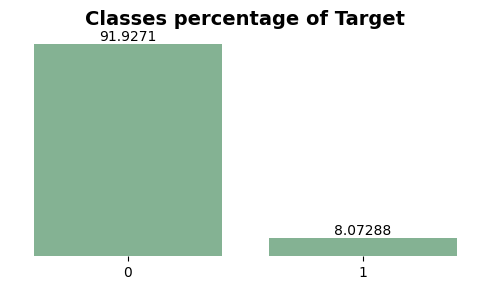

In [154]:
sand.f_countplot(data=eda_train, xaxis="target", stat="percent", title="Classes percentage of Target")

We can see that only 8% of individuals have received a credit while 92% did not.  
This huge difference is a strong indicator of class imbalance. With that  
imbalance, created ML model might start favoring toward majority class. It would  
have high overall accuracy but perform poorly. Also, model might fail to  
correctly predict instances of minority class which is problematic because  
our critical class is 1 (minority).  
Thankfully, there are some mitigation strategies like over/under sampling  
or setting class weights of model that could help to deal with class imbalance  
problem. Some of these will be used in this project

#### Numeric data

In [155]:
eda_train.head(5)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2,0,2,0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0,0,0,0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


First of all let's see distribution of individuals age. But before doing insights  
I will transform feature days_birth to client_age, making days to years

In [156]:
to_rename = {
        "days_birth": "client_age",
        "days_employed": "years_employed",
        "days_registration": "years_registration",
        "days_id_publish": "years_id_publish",
    }
eda_train = eda_train.rename(
    columns=to_rename
)

In [30]:
# After every execution it does maths. Remember to replay .copy()
to_year = ["client_age", "years_employed", "years_registration", "years_id_publish"]
for feature in to_year:
    eda_train[feature] = round(eda_train[feature] / -365.25, 1)

eda_train.head(5)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,client_age,years_employed,years_registration,years_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.9,1.7,10.0,5.8,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.9,3.3,3.2,0.8,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.1,0.6,11.7,6.9,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8.3,26.9,6.7,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2,0,2,0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.6,8.3,11.8,9.5,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0,0,0,0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


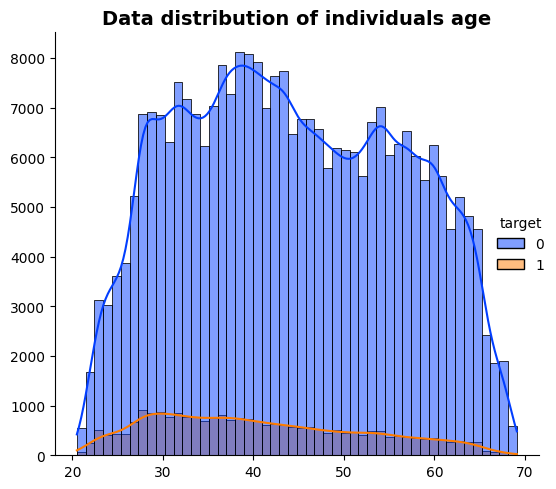

In [31]:
sand.f_displot(
    data=eda_train,
    xaxis="client_age",
    hue="target",
    palette="bright",
    kde=True,
    bins=50,
    title="Data distribution of individuals age",
)

We can see that data doesn't create perfect bell shape form meaning unnormall  
distribution.  
Also, there is strong tendency to decrease credit receive as clients age increases.  
Peak of the most received credits is ~30 old individuals.  
These results suggests for individuals to take credits while they are at younger  
age. As for the company, one of criteria to look for could be client's age

Due to uncertainty of normal data distribution, I will perform D`Agostino's  
K-squared test which fits for larger datasets.  
*alpha=0.05*  
***H0:** p > 0.05, data is normally distributed*  
***Ha:** p < 0.05, data is NOT normally distributed*  

In [32]:
stat, p_value = normaltest(eda_train["client_age"])
print(f"Test statistic: {stat}\np_value: {p_value}")

Test statistic: 93787.37368067139
p_value: 0.0


Very high test statistic indicates non-normal charasteristics in this data.  
Following with extremely low p_value at any conventional level leads us  
to reject null hypothesis, meaning data is **NOT** normally distributed.  
As we saw in plot earlier, data isn't very skewed to any side, so unnormall  
distribution could be caused by extreme outliers. This could happen due to  
interaction of other features. For example despite person is older, he/she could  
have high income, decreasing risks for bank to give a credit

In [33]:
age_income = eda_train[["amt_income_total", "client_age", "target"]]
age_income.head(3)

,amt_income_total,client_age,target
0,202500.0,25.9,1
1,270000.0,45.9,0
2,67500.0,52.1,0


Description table showed that amt_income_total feature might have many extreme  
values due to high standard deviation and max value. For this reason I will  
create two box plots: one standard and other with removed outliers of current  
feature, to see how data looks visually

In [34]:
eda_train_outlied = sand.remove_outliers_iqr(eda_train, "amt_income_total")

Percentage of data removed: 4.6%


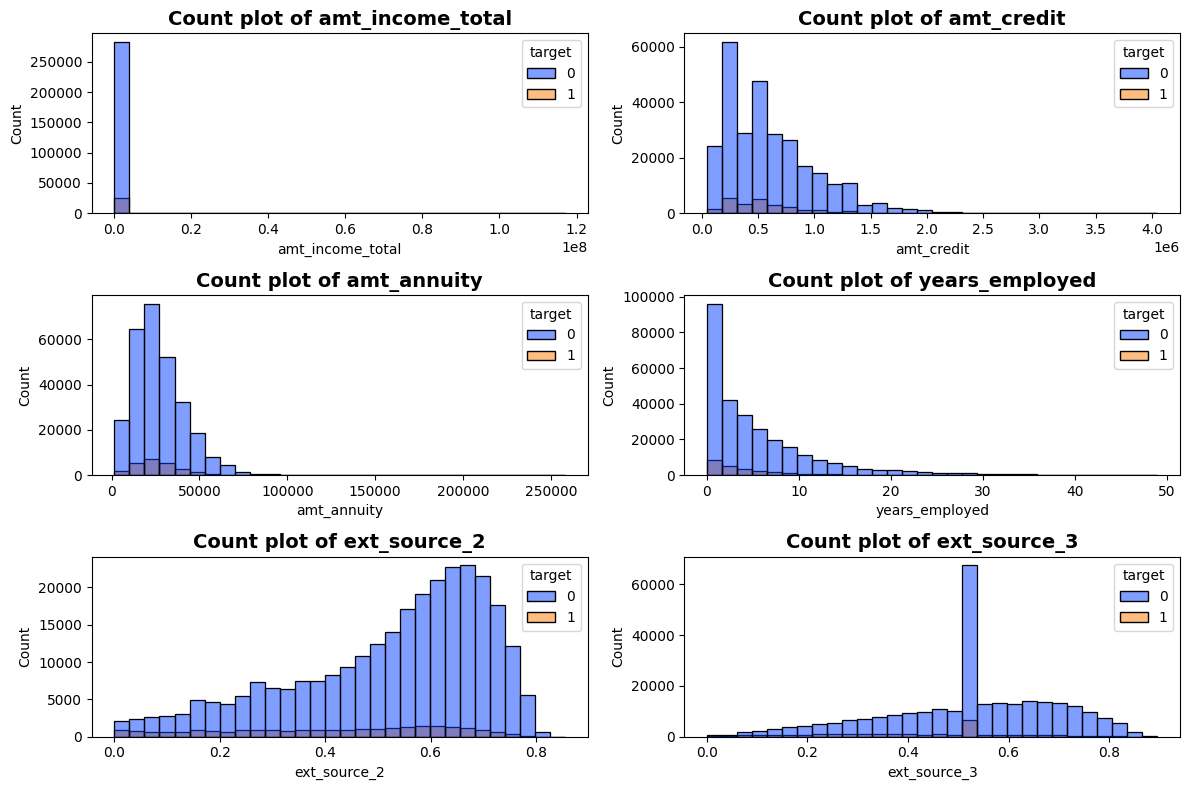

In [35]:
def num_mult(df):
    """
    Visualize distributions of multiple numeric features with histograms.  
      
    This function generates count plots for specified numeric columns in  
    the input DataFrame, colored by the 'transported' variable. It creates  
    a grid of subplots to display the distributions.  
      
    Args:
        df (pd.DataFrame): The input DataFrame containing numeric features  
        and a 'transported' column for hue.  
          
    Returns:  
        None: Displays the histograms but does not return any value.
    """
    
    multiple_numeric = ["amt_income_total", "amt_credit", "amt_annuity", "years_employed", "ext_source_2", "ext_source_3"]
    fig, ax = plt.subplots(3, 2, figsize=(12, 8))
    ax = ax.flatten()
    for i, col in enumerate(multiple_numeric):
        sns.histplot(
            data=df, x=col, bins=30, ax=ax[i], palette="bright", hue="target"
        )
        ax[i].set_title(f"Count plot of {col}", size=14, fontweight="bold", ha="center")
    if len(multiple_numeric) < len(ax):
        fig.delaxes(ax[-1])
    plt.tight_layout()

    plt.show()


num_mult(eda_train)

Insights of subplots:  
- Most of the credit amount requested was ~250k and second most ~500k. These  
are also mostly fulfilled. Data dist. is skewed to the right with the decreasing  
tendency to fulfill requested credit. This shows that amount of credit request  
might be a strong factor for request approvement
- We can see that AMT Annuity most count is around 25k where approved credit  
is also the most. Increasing Annuity - credit approvement decreases  
- Most of loans requested are from 1-2 yeas employed individuals as well as  
most of loans are approved. With increasing years employed, number of requests  
and approvements decreases. This could be due to increased risk for older  
individuals loans where age is a strong factor as we saw in age distribution  
plot earlier  
- External_source_2 count dominates the most in 0.7 where lower number gives  
more chance to have a loan, while source_3 interestingly has most counts and  
approvements in 0.5  
- Since most of these features data distributions are skewed, it might require  
to use logarithmic versions to get distributions more likely to normal

I would be interesting to see if there is significant difference in the average  
amt_income_total or amt_credit between applicants who received loan and those  
who didn't.  
For that purpose I peformed a Two-Sample T-Test for Income by Target.  
*alpha=0.05*  
***H0:** There is no difference in mean income between defaulters (1's) and*  
*non-defaulters (0's)*  
***Ha:** There is a difference in mean income between defaulters and non-defaulters*

In [36]:
non_defaulters = eda_train[eda_train["target"] == 0]["amt_income_total"]
defaulters = eda_train[eda_train["target"] == 1]["amt_income_total"]

To check if variances between two groups are equal, I used Levene's test.  
If p-value is > 0.05, we can assume that variances are equal

In [37]:
stat, p_value_levene = levene(non_defaulters, defaulters)
print("Levene's test p-value:", p_value_levene)

Levene's test p-value: 0.11875019323310389


Based on Levene's test, we can set equal_var=True for t-test parameter

In [38]:
t_stat, p_value_ttest = ttest_ind(non_defaulters, defaulters, equal_var=(p_value_levene > 0.05))
print(f"T-test statistic: {t_stat}")
print(f"p-value: {p_value_ttest}")

T-test statistic: 2.2081011084695983
p-value: 0.027237960879677118


Since p-value is < 0.05, we must to *reject null hypothesis*, and conclude that  
there is a statistically significant difference in mean income between people  
who received loan (defaulters) and people who didn't (non-defaulters).  

#### Categorical data

We will look what kind of individuals come for a loan to have a first look  
opinion on what we are dealing with

In [39]:
cats = ["code_gender", "name_income_type", "name_family_status", "flag_own_realty"]
eda_train_cats = eda_train.copy()
eda_train_cats = eda_train_cats[cats]

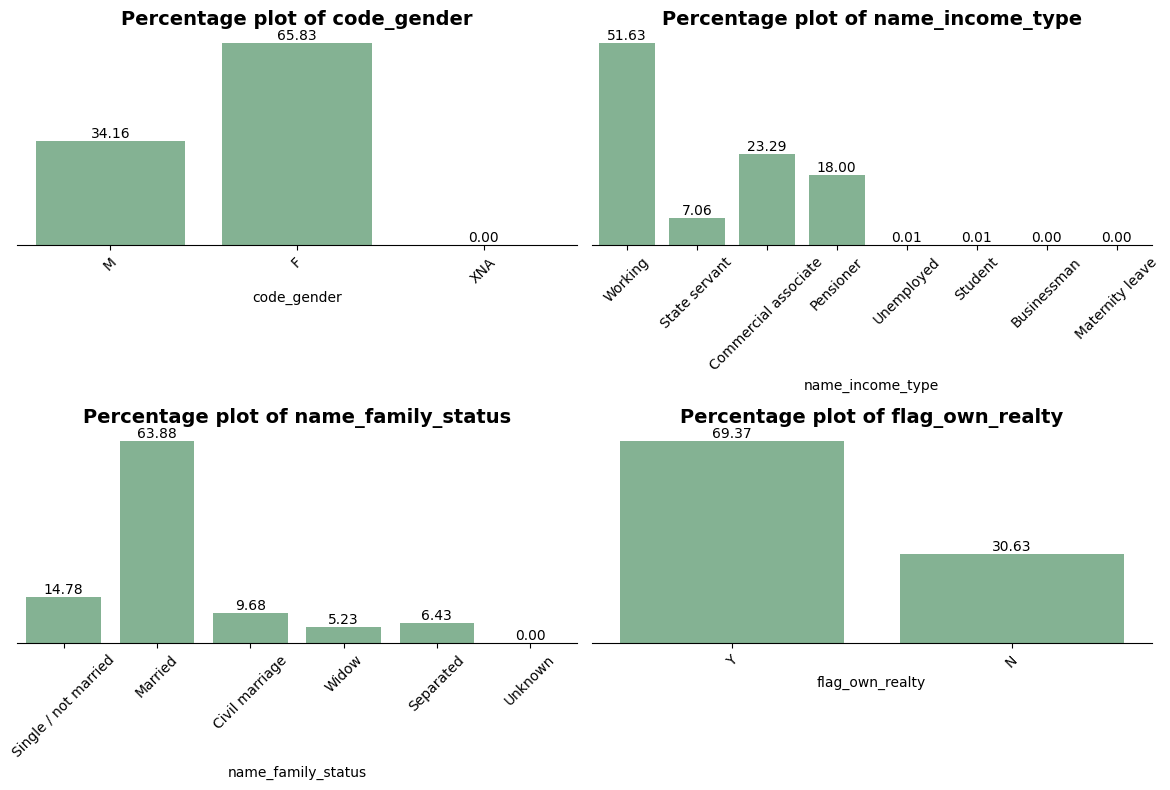

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()
for axis, col in zip(ax, list(eda_train_cats.columns)):
    sns.countplot(
        data=eda_train_cats,
        x=col,
        ax=axis,
        # hue=train_df["transported"],
        stat="percent"
    )
    for container in axis.containers:
        axis.bar_label(container, fmt="%.2f", padding=0)
    axis.axes.get_yaxis().set_visible(False)
    axis.axes.get_xaxis().set_visible(True)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.spines["left"].set_visible(False)
    axis.set_xlabel(col)
    axis.set_ylabel("Count")
    axis.set_title(f"Percentage plot of {col}", size=14, fontweight="bold", ha="center")
    axis.tick_params(axis="x", rotation=45, labelsize=10)
if len(list(eda_train_cats.columns)) < len(ax):
    fig.delaxes(ax[-1])
plt.tight_layout()

plt.show()

- We can see that almost duoble amount of Female individuals comes for a loan  
in comparison with Males;  
- Most individuals are from working class;  
- Married people strongly dominates percently. This is logical and could be  
explained by various reasons. Most likely one is that married people creates  
their life together, looking for a shared house. Also, usually married  
individuals have more stable finances which decreases loan risk;  
- Higher percent of individuals tend to have own realty. It could give some  
hints about their finances and posibility of loan returnment

In [41]:
occupation_target = eda_train[["target", "occupation_type"]]
occupation_target = occupation_target.groupby(["occupation_type", "target"]).size().unstack().reset_index()
occupation_target.columns = ["occupation_type", "t_0", "t_1"]
occupation_target["perc_target1"] = round((occupation_target["t_1"] * 100) / (occupation_target["t_0"] + occupation_target["t_1"]), 2)

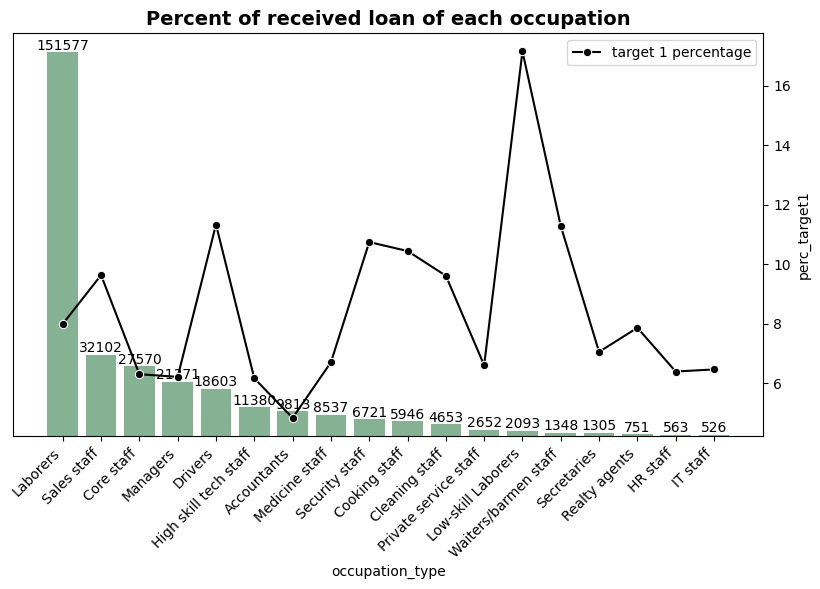

In [42]:
ocup_order = eda_train["occupation_type"].value_counts().index
plt.figure(figsize=(8, 5))
sns.set_palette("crest")
ax = sns.countplot(data=eda_train, x="occupation_type", stat="count", order=ocup_order)
for container in ax.containers:
    ax.bar_label(container)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(True)
ax.set_frame_on(False)
plt.title("Percent of received loan of each occupation", size=14, fontweight="bold", ha="center")
plt.tight_layout()
plt.xticks(rotation=45, ha="right")
lin = sns.lineplot(
    data=occupation_target,
    x="occupation_type",
    y="perc_target1",
    ax=ax.twinx(),
    label="target 1 percentage",
    marker="o",
    color="black",
    errorbar=None,
    estimator="sum",
)

plt.show()

Plot shows that most of individuals tried to get a load were Laborers. What's  
interesting, that highest percent of received loans were low-skill laborers.  
Knowing that low-skill laborers income is one of the lowest, it gives some  
information that income could be not the main factor for a loan

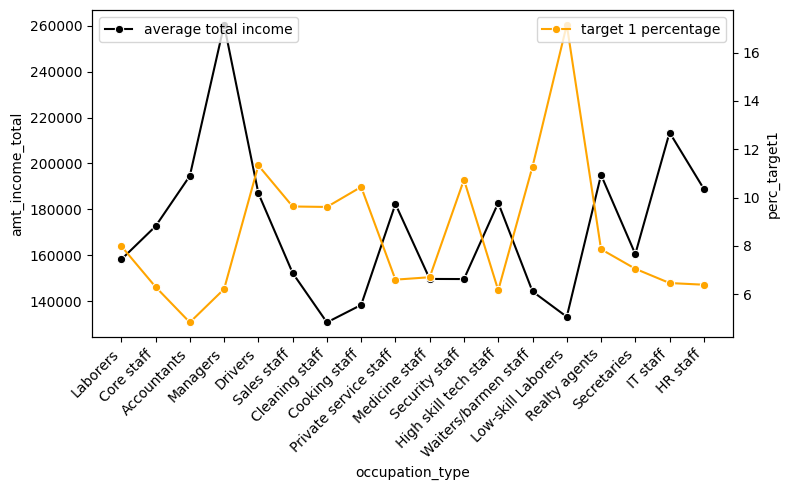

In [43]:
plt.figure(figsize=(8, 5))
income = sns.lineplot(
    data=eda_train,
    x="occupation_type",
    y="amt_income_total",
    label="average total income",
    marker="o",
    color="black",
    errorbar=None,
    estimator="mean",
)
plt.xticks(rotation=45, ha="right")
perc = sns.lineplot(
    data=occupation_target,
    x="occupation_type",
    y="perc_target1",
    label="target 1 percentage",
    marker="o",
    color="orange",
    ax=income.twinx(),
    errorbar=None,
    estimator="sum",
)
plt.tight_layout()
perc.legend(loc="upper right")
income.legend(loc="upper left")

plt.show()
# pasižiūrėti kokio dydžio paskolas ima vidutiniškai

We can actually see from the plot that average total income versus percentage  
of received load of each occupation type is opposite. Meaning the higher average  
total income the lower percentage of received loan

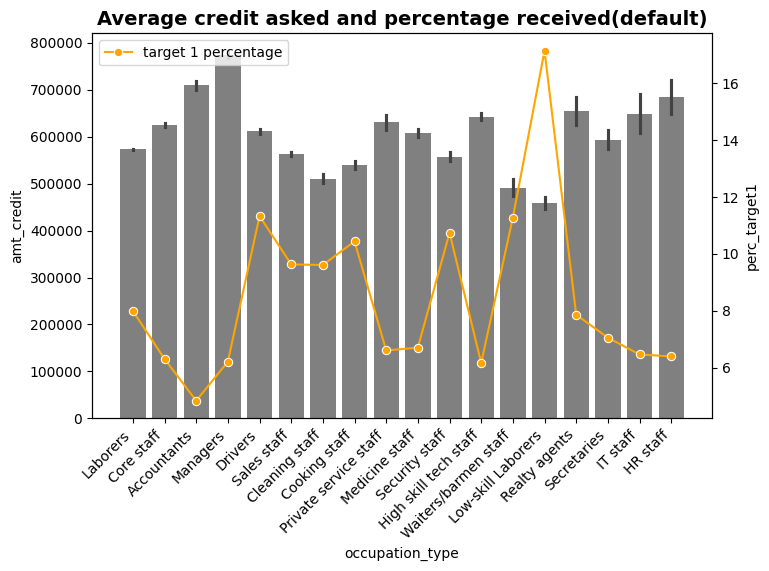

In [44]:
plt.figure(figsize=(8, 5))
avg_credit = sns.barplot(
    data=eda_train,
    x="occupation_type",
    y="amt_credit",
    color="grey",
    estimator="mean"
)
plt.xticks(rotation=45, ha="right")
perc = sns.lineplot(
    data=occupation_target,
    x="occupation_type",
    y="perc_target1",
    label="target 1 percentage",
    marker="o",
    color="orange",
    ax=avg_credit.twinx(),
    errorbar=None,
    estimator="sum",
)
plt.title(
    "Average credit asked and percentage received(default)", 
    size=14, 
    fontweight="bold", 
    ha="center")

plt.show()

From the plot we can see some of correlation between the credit amount and  
percentage of defeault(target 1) loan where higher credit/loan request decreases  
the percentage of default (target 1) loan. Especially it can be seen on low-skill  
laborers average credit

#### Feature Engineering

For feature engineering part, first of all I will copy last dataframe I have  
used to make make less possibilities for mistakes in a future

In [45]:
fe_train = eda_train.copy()

I will take some important features from another table and merge with my main  
fe_train dataframe. But before that, I need to clean df_bureau dataframe, which  
I will do using my dataset_clean function

In [46]:
df_bureau = dataframes["df_bureau"]

def dataset_clean(df):
    df = sand.column_delete(df, nan_perc=40)

    cat_selector = selector(dtype_include=[object, "category"])
    num_selector = selector(dtype_include=[int, float])
    categoric = cat_selector(df)
    numeric = num_selector(df)
    df = sand.nan_imput(df, numericals=numeric, categoricals=categoric)

    df = sand.cleaner(df, info=True)

    return df


df_bureau = dataset_clean(df_bureau)
df_bureau[["sk_id_curr", "sk_id_bureau"]] = df_bureau[
    ["sk_id_curr", "sk_id_bureau"]
].astype(int)

Columns with > 40% NaN values dropped: 
['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
All columns empty spaces have been stripped.
All columns names have been converted to lowercase.

Is there any duplicates?: False
Is there any NaN numbers?: False
Is there any empty cells?: False


Since df_bureau table is clean, I will fetch 3 features and transform:  
- Only active credits per individual;  
- Total sum of credit debt per individual;  
- Total sum of prolonged credits per individual

In [47]:
# Only active credits
df_bureau_active = df_bureau[df_bureau["credit_active"] == "Active"]
active_count = (
    df_bureau_active.groupby("sk_id_curr")
    .size()
    .reset_index(name="active_credit_count")
)

# Credit sum debt
total_credit_debt = (
    df_bureau.groupby("sk_id_curr")
    .agg(total_debt_all=("amt_credit_sum_debt", "sum"))
    .reset_index()
)

# Sum of prolonged credits
prolonged_credits = (
    df_bureau.groupby("sk_id_curr")
    .agg(prol_credits=("cnt_credit_prolong", "sum"))
    .reset_index()
)

Now fetched features will be merged with main - fe_train table on sk_id_curr key

In [48]:
bureau = [active_count, total_credit_debt, prolonged_credits]
for feature in bureau:
    fe_train = fe_train.merge(feature, on="sk_id_curr", how="left")

In [49]:
count = fe_train.isna().sum()
count[count > 0]

active_credit_count    90361
total_debt_all         44020
prol_credits           44020
dtype: int64

After merging new features, we got many NaNs. These are individuals who weren't  
in bureau table, meaning they haven't taken any of credits. Knowing that, we  
can simply change NaNs to 0's.

In [50]:
fe_train[["active_credit_count", "total_debt_all", "prol_credits"]] = fe_train[
    ["active_credit_count", "total_debt_all", "prol_credits"]
].fillna(0)

In [51]:
fe_train["prol_credits"] = fe_train["prol_credits"].astype(object)
fe_train["total_debt_all"] = fe_train["total_debt_all"].apply(
    lambda x: "positive" if x > 0 else ("0" if x == 0 else "negative")
)

In [52]:
fe_train["credit_to_income"] = fe_train["amt_credit"] / fe_train["amt_income_total"]

In [53]:
fe_train["credit_to_income"].describe()

count    307511.000000
mean          3.957570
std           2.689728
min           0.004808
25%           2.018667
50%           3.265067
75%           5.159880
max          84.736842
Name: credit_to_income, dtype: float64

After some feature engineering we can look how credit to income (CTI) impacts  
default target (target_1). Before that I will transform CTI to categorical data  
with some classes

In [54]:
cti = fe_train.copy()

In [55]:
cti["cti_groups"] = pd.cut(
    cti["credit_to_income"],
    bins=[0, 0.5, 1, 2, 3, 5, 10, float("inf")],
    labels=["0-0.5", "0.5-1", "1-2", "2-3", "3-5", "5-10", ">10"]
)

In [56]:
cti_default_rate = cti.groupby("cti_groups", observed=False)["target"].mean().reset_index()

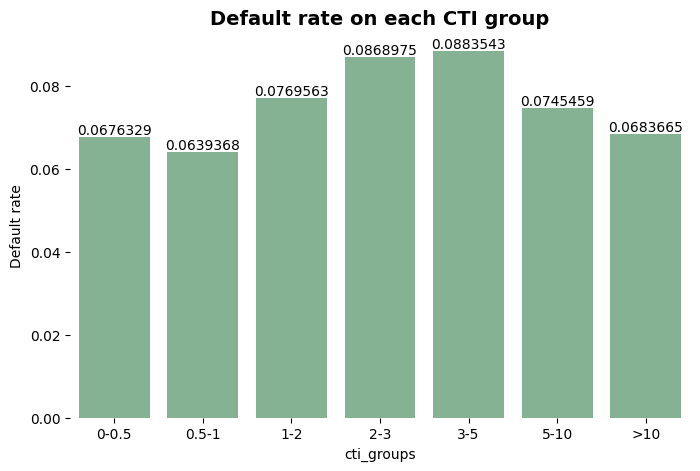

In [57]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=cti_default_rate, x="cti_groups", y="target")
for container in ax.containers:
    ax.bar_label(container)
ax.axes.get_yaxis().set_visible(True)
ax.axes.get_xaxis().set_visible(True)
ax.set_frame_on(False)
ax.set_ylabel("Default rate")
plt.title("Default rate on each CTI group", size=14, fontweight="bold", ha="center")
plt.show()

We can see that most of defaulted loans are for groups 2-3, 3-5. Having number  
higher than 1, means individual asks higher credit than his yearly income.  
If banks evaluates risks properly, it's logical to give higher amount of loan  
in return with higher interests

Let's see how Total Debt distribution looks like. But because it has few extreme  
outliers, for this plot it will be removed to see data more clear

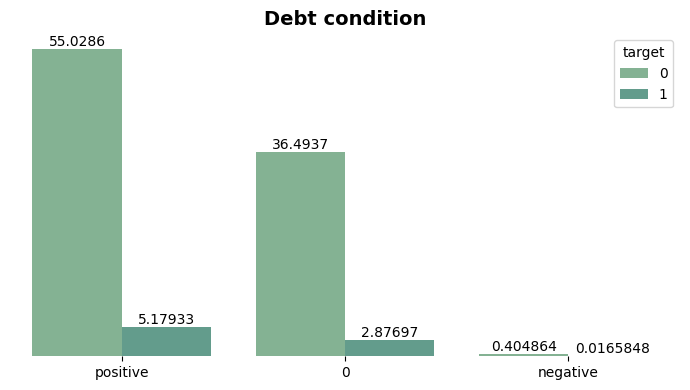

In [58]:
sand.f_countplot(
    xaxis=fe_train["total_debt_all"],
    hue=fe_train["target"],
    figsize=(7, 4),
    title="Debt condition",
    stat="percent"
)
plt.show()

We can see that most of total debt is around zero with some of negative which  
might be overpaid debt, financial derivatives and similar situations. Mainly,  
this plot tells that most of individuals are without debt and number of people  
in debt decreases with the debt amount

At EDA-numeric part we had some features with high skewness. This could decrease  
model's accuracy, model might be bias linear models. To adress skewness, I'll  
use logaritmic transformation for required features

In [59]:
feature_train = fe_train.copy()

In [60]:
to_log = [
    "amt_income_total",
    "amt_credit",
    "amt_annuity",
    "amt_goods_price",
    "years_employed",
    "ext_source_2",
    "ext_source_3",
    "region_population_relative",
    "years_registration",
    "years_id_publish",
    "active_credit_count",
    "credit_to_income"
]
feature_train = sand.feature_log(feature_train, features=to_log)
feature_train.head(3)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,client_age,years_employed,years_registration,years_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,active_credit_count,total_debt_all,prol_credits,credit_to_income
0,100002,1,Cash loans,M,N,Y,0,12.218500,12.915581,10.114619,12.768544,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018626,25.9,0.993252,2.397895,1.916923,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.233449,0.130481,2,2,2,2,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.098612,positive,0.0,1.101238
1,100003,0,Cash loans,F,N,N,0,12.506181,14.072865,10.482892,13.937287,Family,State servant,Higher education,Married,House / apartment,0.003535,45.9,1.458615,1.435085,0.587787,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.483811,0.428710,1,0,1,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.693147,0,0.0,1.756262
2,100004,0,Revolving loans,M,Y,Y,0,11.119898,11.813037,8.817446,11.813037,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.009982,52.1,0.470004,2.541602,2.066863,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.442062,0.547871,0,0,0,0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0.0,1.098612


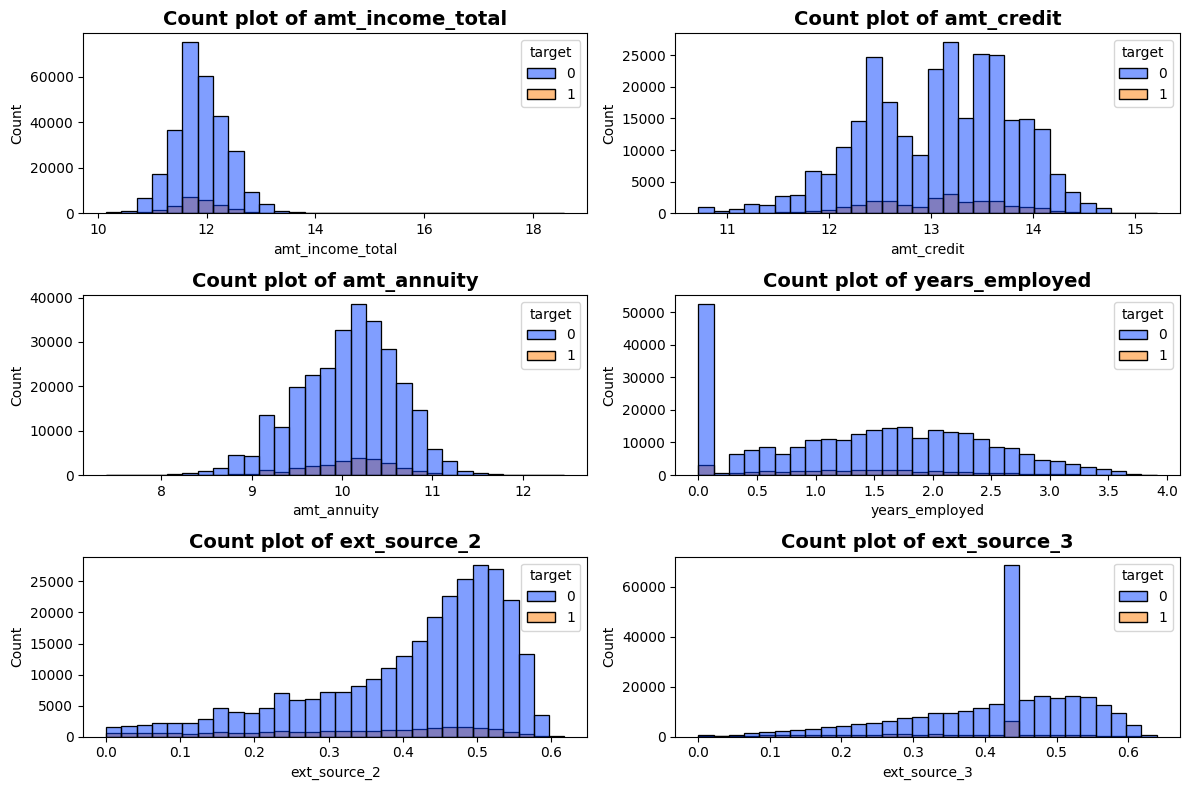

In [61]:
num_mult(feature_train)

This looks more like normal distribution. Sure there are few abnormal bars, but  
the plots still looks more trustable

#### Other insights

I will check categorical features degree of dependency on target variable by  
using mutual info score function. Higher values means higher dependency. It  
implies that we can get better prediction on target variable

In [62]:
categoricals = feature_train.select_dtypes(include=["object"])

def cat_mut_inf(series):
    return mutual_info_score(series, feature_train["target"])

scores_cat = categoricals.apply(cat_mut_inf)
scores_cat = scores_cat.sort_values(ascending=False).to_frame(name="mutual_info_score")
scores_cat.head(10)

,mutual_info_score
organization_type,0.002668
name_income_type,0.002114
occupation_type,0.001856
name_education_type,0.001796
code_gender,0.001452
reg_city_not_work_city,0.001226
flag_emp_phone,0.001159
flag_document_3,0.001032
reg_city_not_live_city,0.000873
name_family_status,0.000809


As we can see non of features have high dependency for target individually.  
None of these feature alone provide much predictive information about the target.  
Despite low score, occupation_type and name_education_type may provide slight  
insights into the target, potentially related to social-economic background

We can also check multicollinearity of numeric features using Variance  
Inflation Factor (VIF). Having VIF > 10 suggests there is high correlation with  
other features. This would help us decrease redundancy of features

In [63]:
numericals = feature_train.select_dtypes(include=["number"])
sand.calc_vif(numericals).head(5)

,variables,VIF
4,amt_credit,37247.106653
3,amt_income_total,16591.967856
6,amt_goods_price,14489.588237
5,amt_annuity,1327.201234
31,credit_to_income,578.807858


We can see variables with very high VIF values which need to be fixed on one way  
or another.  
One of methods is to make feature rations of high VIF variables. Luckly, I have  
done one of two highest VIF's and made - credit_to_income. I can remove top 2  
and leave just credit_to_income. Let's look what we will get

In [64]:
vif_train = feature_train.copy()

In [65]:
vif_train = vif_train.drop(columns=["amt_credit", "amt_income_total"])

In [66]:
numericals = vif_train.select_dtypes(include=["number"])
sand.calc_vif(numericals).head(5)

,variables,VIF
4,amt_goods_price,1505.435738
3,amt_annuity,1257.409374
19,obs_60_cnt_social_circle,448.215470
17,obs_30_cnt_social_circle,448.215152
11,region_rating_client,185.508803


- amt_goods_price are often related in financial datasets, as amt_credit might be  
calculated based on the price of goods

In [67]:
vif_train = vif_train.drop(columns=["amt_goods_price"])
numericals = vif_train.select_dtypes(include=["number"])
sand.calc_vif(numericals).head(5)

,variables,VIF
18,obs_60_cnt_social_circle,448.181198
16,obs_30_cnt_social_circle,448.175181
10,region_rating_client,185.257559
11,region_rating_client_w_city,182.488188
3,amt_annuity,128.180483


We still have few extremely high variables we need to fix.  
- with social_circle I will leave only "obs_60_cnt_social_circle" since it  
captures broader timeframe and might be more informative;  
- with client rating, with same logic I'll leave "region_rating_client_w_city"

In [68]:
vif_train = vif_train.drop(columns=["obs_30_cnt_social_circle", "region_rating_client"])
numericals = vif_train.select_dtypes(include=["number"])
sand.calc_vif(numericals).head(10)

,variables,VIF
3,amt_annuity,124.981197
9,cnt_fam_members,29.818324
10,region_rating_client_w_city,22.690212
5,client_age,20.024639
14,ext_source_3,15.543646
11,hour_appr_process_start,15.458423
8,years_id_publish,12.649859
26,credit_to_income,12.290494
13,ext_source_2,11.952192
7,years_registration,9.219082


Now we can see strongly better view. For now, I'll leave it for ML model and  
might return on model upgrading part with PCA technique

---

In [69]:
ml_train_1 = vif_train.copy()
# ml_train_1.to_csv(r"D:\IT_projects\Turing_Colledge\train_df.csv", index=False)

In [70]:
"""
- patikrinti kai su metais mažėja paskolos davimas, bet tuo pačiu, jeigu  
didesnis atlyginimas vyresniam ar taip pat mažėja galimybė gauti paskolą
class imbalance lytims ir tikimybė gauti paskolą
- Linijiniam modeliam reikės gero scaler'io dėl extremalių outlierių
"""

"\n- patikrinti kai su metais mažėja paskolos davimas, bet tuo pačiu, jeigu  \ndidesnis atlyginimas vyresniam ar taip pat mažėja galimybė gauti paskolą\nclass imbalance lytims ir tikimybė gauti paskolą\n- Linijiniam modeliam reikės gero scaler'io dėl extremalių outlierių\n"

---

#### Data Test preparation

In [ ]:
# df_bureau - paruostas
# df_bureau_active, total_credit_debt, prolonged_credits - paruostas
# deleted columns as "deleted" + 
# "numbin" astype("category") +
# "cat_selector", "num_selector" to select categoric and numeric data from df +
# sand.nan_imput for df +
# "to_int" to make df dtype(int) +
# sand.cleaner for final check +

# clean_test["days_employed"] = clean_test["days_employed"].apply(
    # lambda x: 0 if x > 0 else x) +

# to_rename for columns rename +

# to_year = ["client_age", "years_employed", "years_registration", "years_id_publish"]
# for feature in to_year:
#     clean_test[feature] = round(clean_test[feature] / -365.25, 1) +

# bureau = [active_count, total_credit_debt, prolonged_credits]
# for feature in bureau:
#     clean_test = clean_test.merge(feature, on="sk_id_curr", how="left") +

# clean_test[["active_credit_count", "total_debt_all", "prol_credits"]] = clean_test[
#     ["active_credit_count", "total_debt_all", "prol_credits"]
# ].fillna(0) +

# clean_test["prol_credits"] = clean_test["prol_credits"].astype(object)
# clean_test["total_debt_all"] = clean_test["total_debt_all"].apply(
#     lambda x: "positive" if x > 0 else ("0" if x == 0 else "negative")) +

# clean_test["credit_to_income"] = clean_test["amt_credit"] / clean_test["amt_income_total"] +

# turn logaritmic "to_log" -> sand.feature_log() +

# drop after vif vif_drop = ["amt_credit", "amt_income_total", "amt_goods_price",
# "obs_30_cnt_social_circle", "region_rating_client"]

At the beggining of project I've mentioned that we have two data sets, one for  
training and one for testing. Through this data analysis and modeling we have  
been using only training dataset. Various data cleaning methods, column  
transformations, etc. were added to final dataframe which was used to train  
model. Since test dataset wasn't touched, we need to apply all these changes to  
a data, that will be used in real life model

In [ ]:
df_test = dataframes["df_test"]

In [190]:
clean_test = df_test.copy()
clean_test.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [ ]:
clean_test = clean_test.drop(columns=deleted)

clean_test[numbin] = clean_test[numbin].astype("category")

clean_test = sand.nan_imput(clean_test, num_selector(clean_test), cat_selector(clean_test))

int_dtype = list(to_int)
int_dtype.remove("TARGET")
clean_test[int_dtype] = clean_test[int_dtype].astype(int)

clean_test = sand.cleaner(clean_test, info=False)

clean_test["days_employed"] = clean_test["days_employed"].apply(
    lambda x: 0 if x > 0 else x)

clean_test = clean_test.rename(columns=to_rename)

for feature in to_year:
    clean_test[feature] = round(clean_test[feature] / -365.25, 1)

for feature in bureau:
    clean_test = clean_test.merge(feature, on="sk_id_curr", how="left")

clean_test[["active_credit_count", "total_debt_all", "prol_credits"]] = clean_test[
    ["active_credit_count", "total_debt_all", "prol_credits"]
].fillna(0)

clean_test["prol_credits"] = clean_test["prol_credits"].astype(object)
clean_test["total_debt_all"] = clean_test["total_debt_all"].apply(
    lambda x: "positive" if x > 0 else ("0" if x == 0 else "negative"))

clean_test["credit_to_income"] = clean_test["amt_credit"] / clean_test["amt_income_total"]

clean_test = sand.feature_log(clean_test, features=to_log)

vif_drop = ["amt_credit", "amt_income_total", "amt_goods_price",
"obs_30_cnt_social_circle", "region_rating_client"]

clean_test = clean_test.drop(columns=vif_drop)

# clean_test.to_csv("clean_test.csv", index=False)

clean_test.head(3)

,sk_id_curr,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_annuity,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,client_age,years_employed,years_registration,years_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,active_credit_count,total_debt_all,prol_credits,credit_to_income
0,100001,Cash loans,F,N,Y,0,9.931176,Unaccompanied,Working,Higher education,Married,House / apartment,0.018675,52.7,2.001480,2.721295,1.163151,1,1,0,1,0,1,Laborers,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.582023,0.148006,0,0,0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.386294,positive,0.0,1.651219
1,100005,Cash loans,M,N,Y,0,9.762557,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035166,49.5,2.580217,3.258097,1.686399,1,1,0,1,0,0,Low-skill Laborers,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.255925,0.359743,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1.098612,positive,0.0,1.178711
2,100013,Cash loans,M,Y,Y,0,11.153074,Unaccompanied,Working,Higher education,Married,House / apartment,0.018921,54.9,2.580217,1.945910,2.360854,1,1,0,1,0,0,Drivers,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.530503,0.476850,0,0,0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0.000000,0,0.0,1.452872
